# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[95,  4, 74, ..., 77, 76, 80],
       [77, 81, 81, ..., 48, 28, 23],
       [54, 46, 83, ..., 10, 90, 68],
       ...,
       [ 7, 74, 47, ..., 77, 18, 38],
       [59, 91, 48, ..., 34, 42, 90],
       [21, 52, 14, ...,  5, 94, 14]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [3]:
B = A[:, np.random.permutation(A.shape[1])]
B

array([[45, 77, 76, ..., 96, 19, 87],
       [93, 48, 36, ..., 25, 10, 17],
       [41, 10, 92, ..., 88, 49, 19],
       ...,
       [ 2, 77, 48, ..., 96, 13, 45],
       [86, 34, 68, ..., 76, 83, 71],
       [97,  5, 75, ..., 30,  1, 87]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [5]:
m = A[:,::2].sum(axis=1) > A[:,1::2].sum(axis=1).mean()
B = A[m]
B, B.shape

(array([[95,  4, 74, ..., 77, 76, 80],
        [77, 81, 81, ..., 48, 28, 23],
        [54, 46, 83, ..., 10, 90, 68],
        ...,
        [11, 62, 89, ..., 65, 73, 74],
        [80, 91, 15, ..., 63, 95, 24],
        [59, 91, 48, ..., 34, 42, 90]]),
 (97, 50))

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [16]:
diff = A.max(axis=1) - A.min(axis=1)
np.where(diff==diff.max())[0][0]

2

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [20]:
(np.asarray(A).reshape(-1).argsort().argsort() + 1).reshape(A.shape)

array([[9583,  458, 7442, ..., 7711, 7594, 8021],
       [7668, 8084, 8094, ..., 4786, 2745, 2293],
       [5401, 4576, 8359, ..., 1042, 9045, 6757],
       ...,
       [ 719, 7408, 4685, ..., 7669, 1862, 3729],
       [5909, 9170, 4785, ..., 3360, 4094, 9067],
       [2114, 5212, 1459, ...,  515, 9489, 1410]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [31]:
(A - A.min(axis=1)[:, np.newaxis]) / (A.max(axis=1) - A.min(axis=1))[:, np.newaxis]

array([[0.98958333, 0.04166667, 0.77083333, ..., 0.80208333, 0.79166667,
        0.83333333],
       [0.76923077, 0.81318681, 0.81318681, ..., 0.45054945, 0.23076923,
        0.17582418],
       [0.54545455, 0.46464646, 0.83838384, ..., 0.1010101 , 0.90909091,
        0.68686869],
       ...,
       [0.05263158, 0.75789474, 0.47368421, ..., 0.78947368, 0.16842105,
        0.37894737],
       [0.59183673, 0.91836735, 0.47959184, ..., 0.33673469, 0.41836735,
        0.90816327],
       [0.20408163, 0.52040816, 0.13265306, ..., 0.04081633, 0.94897959,
        0.13265306]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [40]:
np.array(range(1,11))[:, np.newaxis, np.newaxis] * np.resize(A, (10,200,50))

array([[[ 95,   4,  74, ...,  77,  76,  80],
        [ 77,  81,  81, ...,  48,  28,  23],
        [ 54,  46,  83, ...,  10,  90,  68],
        ...,
        [  7,  74,  47, ...,  77,  18,  38],
        [ 59,  91,  48, ...,  34,  42,  90],
        [ 21,  52,  14, ...,   5,  94,  14]],

       [[190,   8, 148, ..., 154, 152, 160],
        [154, 162, 162, ...,  96,  56,  46],
        [108,  92, 166, ...,  20, 180, 136],
        ...,
        [ 14, 148,  94, ..., 154,  36,  76],
        [118, 182,  96, ...,  68,  84, 180],
        [ 42, 104,  28, ...,  10, 188,  28]],

       [[285,  12, 222, ..., 231, 228, 240],
        [231, 243, 243, ..., 144,  84,  69],
        [162, 138, 249, ...,  30, 270, 204],
        ...,
        [ 21, 222, 141, ..., 231,  54, 114],
        [177, 273, 144, ..., 102, 126, 270],
        [ 63, 156,  42, ...,  15, 282,  42]],

       ...,

       [[760,  32, 592, ..., 616, 608, 640],
        [616, 648, 648, ..., 384, 224, 184],
        [432, 368, 664, ...,  80, 720, 544

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [42]:
even_columns = A[:, ::2]
odd_columns = A[:, 1::2]
np.concatenate((even_columns, odd_columns), axis=1)

array([[95, 74, 29, ..., 27, 77, 80],
       [77, 81, 42, ..., 91, 48, 23],
       [54, 83, 80, ..., 14, 10, 68],
       ...,
       [ 7, 47, 86, ..., 81, 77, 38],
       [59, 48, 72, ..., 51, 34, 90],
       [21, 14, 28, ..., 23,  5, 14]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [47]:
np.all(A > 5, axis=1).sum()

11

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [64]:
b = np.array(np.split(A, 10, axis=0)).mean(axis=0)
b, b.shape

(array([[48.3, 45.3, 31.5, 63.7, 46.5, 41.7, 50.9, 57. , 38.7, 46.3, 58.2,
         39.9, 49.9, 45. , 29.9, 70.4, 40.9, 43.2, 40.4, 44.2, 42.4, 46.9,
         37.3, 51.4, 45.7, 47.4, 56.9, 32.1, 45.2, 44. , 47.6, 48.6, 35. ,
         69.5, 40.2, 56.4, 43.5, 52.9, 34.2, 56.9, 70. , 45.3, 47.2, 69.4,
         61. , 33.9, 42.9, 52.1, 56.8, 60.5],
        [54.9, 56.2, 63.2, 52.1, 49.9, 51. , 48.4, 63.6, 51.4, 37.2, 42.1,
         38.6, 60.8, 34.3, 49.7, 46.4, 62.5, 47.5, 52.5, 32.5, 48.7, 72. ,
         58.3, 60.9, 50.9, 61.4, 46.4, 38.8, 37.5, 54.3, 35.7, 53.7, 42.4,
         58.7, 55.9, 49.7, 58.9, 44.4, 54.8, 33.8, 51. , 46.7, 37.8, 49. ,
         46.6, 54.5, 62.6, 40.1, 50.5, 40.1],
        [58.5, 28.2, 45.1, 50. , 68.4, 71.2, 68.9, 42.1, 65.5, 53.6, 33.5,
         65.2, 46.1, 44.7, 48.4, 55.7, 62.2, 46.8, 33.5, 55.9, 42.8, 38. ,
         55.2, 43.3, 33.8, 46. , 36.8, 63.2, 54.5, 57. , 42.5, 36.7, 60.3,
         45.3, 47.9, 32.3, 57.7, 56.2, 67.1, 51.3, 41.4, 40.7, 49.1, 43.6,
        

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [82]:
_, indexes = np.unique(A.flatten(), True)
A.flatten()[indexes.sort()][0]

array([95,  4, 74, ...,  5, 94, 14])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [86]:
mean_row = A.mean(axis=0)
np.linalg.norm(A-mean_row, axis=1)

array([216.98244629, 187.6203134 , 202.52526262, 192.83454566,
       202.24886155, 214.94027543, 191.40152037, 194.55444482,
       200.55368857, 188.97066439, 212.75528666, 201.88308993,
       197.55409892, 195.06812143, 200.42195987, 182.21128395,
       204.00265194, 197.90283474, 222.04637353, 218.77619157,
       198.84730825, 210.85604568, 177.87310646, 198.39007536,
       197.60119433, 177.62435644, 185.32126699, 216.78904954,
       211.34228635, 211.25915838, 207.6353101 , 214.41388015,
       191.37043136, 206.10044153, 198.37530592, 199.56603418,
       201.61109096, 192.88175652, 199.26914463, 213.54309167,
       205.97582868, 199.98542947, 206.32147731, 204.32259297,
       201.03234068, 185.81849208, 198.91066336, 228.65607799,
       197.26163337, 208.98708573, 198.12665646, 201.75188227,
       187.91879097, 218.18941771, 197.83559336, 192.17086668,
       209.57416826, 212.90075622, 201.69876549, 205.94504607,
       196.75294661, 217.476716  , 195.29770096, 220.58

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [87]:
np.where(A < 50, A * 2, A * 3)

array([[285,   8, 222, ..., 231, 228, 240],
       [231, 243, 243, ...,  96,  56,  46],
       [162,  92, 249, ...,  20, 270, 204],
       ...,
       [ 14, 222,  94, ..., 231,  36,  76],
       [177, 273,  96, ...,  68,  84, 270],
       [ 42, 156,  28, ...,  10, 282,  28]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [103]:
def window(a, n):
    return np.convolve(a, np.ones(n), 'valid') / n

flattened = A.flatten()

w3 = window(flattened, 3)
w5 = window(flattened, 5)
w10 = window(flattened, 10)

np.array([np.resize(w3, A.shape), np.resize(w5, A.shape), np.resize(w10, A.shape)]).sum(0)

array([[156.86666667, 128.76666667, 138.3       , ..., 221.16666667,
        224.06666667, 211.83333333],
       [201.26666667, 172.46666667, 153.36666667, ..., 132.8       ,
        142.        , 166.1       ],
       [198.6       , 209.83333333, 226.56666667, ..., 168.5       ,
        219.9       , 183.9       ],
       ...,
       [159.16666667, 197.23333333, 199.03333333, ..., 151.93333333,
        140.63333333, 170.76666667],
       [186.8       , 178.56666667, 152.83333333, ..., 151.93333333,
        145.2       , 154.73333333],
       [109.1       , 134.56666667, 133.56666667, ..., 112.76666667,
        141.96666667, 122.06666667]])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

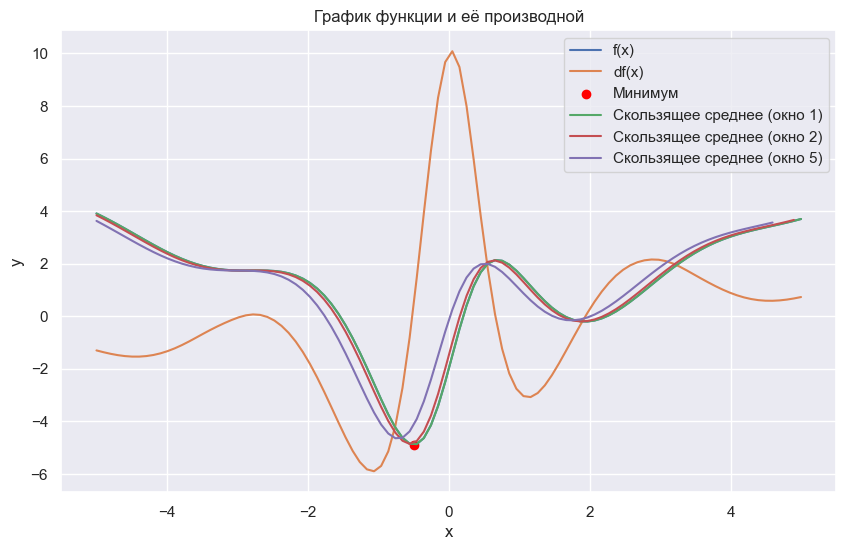

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def f(x):
    return (5 * np.sin(2*x) - np.cos(x)**2 - 1 + np.abs(x**3) - x**2) / (x**2 + 1)

# Определение производной функции
def df(x):
    return -(10*x*np.sin(2*x)+((-10*x**2)-10)*np.cos(2*x)+((-x**3)-3*x)*abs(x)+((-2*x**2)-2)*np.cos(x)*np.sin(x)-2*x*np.cos(x)**22)/(x**4+2*x**2+1)

x = np.linspace(-5, 5, 100)

# Построение графика функции
plt.figure(figsize=(10, 6))
plt.plot(x, f(x), label='f(x)')
plt.plot(x, df(x), label="df(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции и её производной')
plt.legend()
plt.grid(True)

# Нахождение минимума функции
min_result = minimize(f, x0=0)
min_x = min_result.x
min_y = f(min_x)
plt.scatter(min_x, min_y, color='red', label='Минимум')

# Построение графиков скользящего среднего
plt.plot(x,window(f(x),1), label=f'Скользящее среднее (окно {1})')
plt.plot(x[:-1],window(f(x),2), label=f'Скользящее среднее (окно {2})')
plt.plot(x[:-4],window(f(x),5), label=f'Скользящее среднее (окно {5})')

plt.legend()
plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [2]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 4, 4, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [3]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2003

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [4]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


-0.13580565475012618

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.